In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
print('>>> workclass:',len(df.workclass.unique()), 'elements:' ,df.workclass.unique())
print('>>> marital-status:',len(df['marital-status'].unique()), 'elements:' ,df['marital-status'].unique())
print('>>> occupation:',len(df['occupation'].unique()), 'elements:' ,df['occupation'].unique())
print('>>> relationship:',len(df['relationship'].unique()), 'elements:' ,df['relationship'].unique())
print('>>> race:',len(df['race'].unique()), 'elements:' ,df['race'].unique())
print('>>> gender:',len(df['gender'].unique()), 'elements:' ,df['gender'].unique())
print('>>> native-country:',len(df['native-country'].unique()), 'elements:' ,df['native-country'].unique())
print('>>> income:',len(df['income'].unique()), 'elements:' ,df['income'].unique())

>>> workclass: 9 elements: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
>>> marital-status: 7 elements: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
>>> occupation: 15 elements: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
>>> relationship: 6 elements: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
>>> race: 5 elements: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
>>> gender: 2 elements: ['Male' 'Female']
>>> native-country: 42 elements: ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'S

In [7]:
df.groupby('native-country').count().sort_values(by='income', ascending=False).head(5).income

native-country
United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Name: income, dtype: int64

native-country исключаем из-за слишком неравномерного распределения

In [8]:
print(list(df.dtypes[df.dtypes=='int64'].index))

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158F7FE0940>,
      dtype=object)

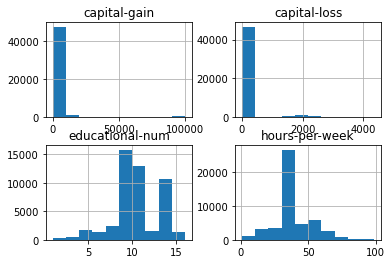

In [9]:
df.hist(column=["educational-num", "capital-gain", "capital-loss", "hours-per-week"])

"capital-gain" и "capital-loss" убираем из-за множества нулей в распределении

In [10]:
numerical = ['age', 'educational-num', 'hours-per-week']
categorical = ['workclass', 'marital-status', 'occupation', 'race']
dummy = ['gender']
target = ['income']

Группируем некоторые значения полей

In [11]:
workclass_dict = {'Private':'Private', 'Local-gov':'Government', '?':'Other/Unknown',
                  'Self-emp-not-inc':'Self-employed', 'Federal-gov':'Government',
                  'State-gov':'Government', 'Self-emp-inc':'Self-employed', 'Without-pay':'Other/Unknown',
                  'Never-worked':'Other/Unknown'}
marital_status_dict = {'Never-married':'Single', 'Married-civ-spouse':'Married', 
                       'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'}
occupation_dict = {'Adm-clerical':'White-Collar', 'Craft-repair':'Blue-Collar',
                   'Exec-managerial':'White-Collar', 'Farming-fishing':'Blue-Collar',
                   'Handlers-cleaners':'Blue-Collar', 'Machine-op-inspct':'Blue-Collar',
                   'Other-service':'Service', 'Priv-house-serv':'Service', 'Prof-specialty':'Professional',
                   'Protective-serv':'Service', 'Tech-support':'Service', 'Transport-moving':'Blue-Collar',
                   '?':'Other/Unknown', 'Armed-Forces':'Other/Unknown'}

In [12]:
df.workclass.replace(to_replace=workclass_dict, inplace=True)
df['marital-status'].replace(to_replace=marital_status_dict, inplace=True)
df.occupation.replace(to_replace=occupation_dict, inplace=True)
df.gender.replace(to_replace={'Male':0, 'Female':1}, inplace=True)
df.income.replace(to_replace={'<=50K':0, '>50K':1}, inplace=True)

In [13]:
print('>>> workclass:',len(df.workclass.unique()), 'elements:' ,df.workclass.unique())
print('>>> marital-status:',len(df['marital-status'].unique()), 'elements:' ,df['marital-status'].unique())
print('>>> occupation:',len(df['occupation'].unique()), 'elements:' ,df['occupation'].unique())

>>> workclass: 4 elements: ['Private' 'Government' 'Other/Unknown' 'Self-employed']
>>> marital-status: 5 elements: ['Single' 'Married' 'Widowed' 'Divorced' 'Separated']
>>> occupation: 6 elements: ['Blue-Collar' 'Service' 'Other/Unknown' 'Professional' 'White-Collar'
 'Sales']


In [14]:
df_reduced = pd.get_dummies(df[numerical+categorical+dummy+target], columns=categorical)
df_reduced.head()

,age,educational-num,hours-per-week,gender,income,workclass_Government,workclass_Other/Unknown,workclass_Private,workclass_Self-employed,marital-status_Divorced,...,occupation_Other/Unknown,occupation_Professional,occupation_Sales,occupation_Service,occupation_White-Collar,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,7,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,12,40,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,44,10,40,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,30,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
X_train,  X_test, y_train, y_test = train_test_split(df_reduced.drop(columns=['income']), 
                                                     df_reduced.income, 
                                                     test_size=0.3)

### Models

In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Логистическая регрессия

In [91]:
from sklearn.linear_model import LogisticRegression

In [98]:
LRClas  = LogisticRegression(solver='liblinear',
                            penalty= 'l2')
LRClas.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
print('accuracy:',accuracy_score(y_test, LRClas.predict(X_test)))
print('precision:',precision_score(y_test,LRClas.predict(X_test)))
print('recall:',recall_score(y_test,LRClas.predict(X_test)))
print('f:',f1_score(y_test,LRClas.predict(X_test)))

accuracy: 0.8278850747287245
precision: 0.6847457627118644
recall: 0.5189837282329431
f: 0.5904514452744397


roc_auc_score:  0.8777427291661599


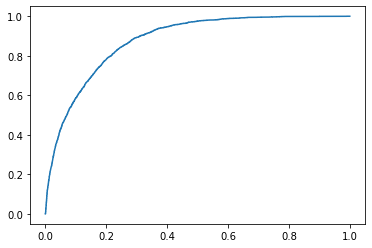

In [123]:
fpr, tpr, thres = roc_curve(y_test, LRClas.predict_proba(X_test)[:,1])
print('roc_auc_score: ',roc_auc_score(y_test, LRClas.predict_proba(X_test)[:,1]))
plt.plot( fpr, tpr )

Случайный лес

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

In [118]:
n_estimators = [30,50,100];
max_depth = [3, 5, 7, 15];
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=1)

parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
             }
grid_RF = GridSearchCV(estimator=RandomForestClassifier(max_features='auto', n_jobs=-1),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_RF = grid_RF.fit(X_train, y_train).best_estimator_

In [117]:
grid_RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
print('accuracy:',accuracy_score(y_test, grid_RF.predict(X_test)))
print('precision:',precision_score(y_test,grid_RF.predict(X_test)))
print('recall:',recall_score(y_test,grid_RF.predict(X_test)))
print('f:',f1_score(y_test,grid_RF.predict(X_test)))

accuracy: 0.8327304988739507
precision: 0.6959761549925484
recall: 0.5332572081073366
f: 0.6038467754970098


roc_auc_score:  0.8867958917980617


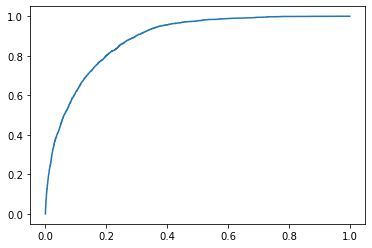

In [124]:
fpr, tpr, thres = roc_curve(y_test, grid_RF.predict_proba(X_test)[:,1])
print('roc_auc_score: ',roc_auc_score(y_test, grid_RF.predict_proba(X_test)[:,1]))
plt.plot( fpr, tpr )

К - ближайших соседей

In [125]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,31)
weights_options=['uniform','distance']
params = {'n_neighbors':k_range, 'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid_KN = GridSearchCV(KNeighborsClassifier(), params,cv=cv,verbose = False, n_jobs=-1)

grid_KN = grid_KN.fit(X_train,y_train).best_estimator_

In [126]:
grid_KN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [129]:
print('accuracy:',accuracy_score(y_test, grid_KN.predict(X_test)))
print('precision:',precision_score(y_test,grid_KN.predict(X_test)))
print('recall:',recall_score(y_test,grid_KN.predict(X_test)))
print('f:',f1_score(y_test,grid_KN.predict(X_test)))

accuracy: 0.8142359926294956
precision: 0.6468597216998871
recall: 0.49100770767913215
f: 0.558260305095748


roc_auc_score:  0.855970423813541


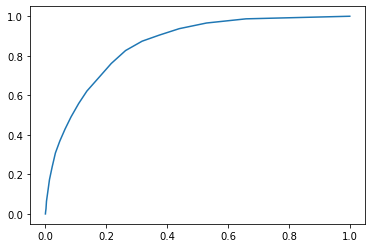

In [130]:
fpr, tpr, thres = roc_curve(y_test, grid_KN.predict_proba(X_test)[:,1])
print('roc_auc_score: ',roc_auc_score(y_test, grid_KN.predict_proba(X_test)[:,1]))
plt.plot( fpr, tpr )